In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from constants import *
from transformer import DecoderOnlyTransformer

benchmark_config_1 = {
    "embedding_dimension": 768,  # units
    "ff_dimension": 768,  # hidden_size
    "n_attention_heads": 12,  # num_heads
    "n_encoder_layers": 0,  # num_layers
    "n_decoder_layers": 12,  # num_layers
    "dataset": Dataset.PennTreebank.name,
    "segmentation": Segmentation.Subword.name,
    "vocab_size": 40000,
    "max_seq_len": 64,  # max_length
    "dropout": 0,  # dropout
    "batch_size": 12,
    "eval_batch_size": 8,
    "n_epochs": 37,
    "learning_rate": 0.000034375,
    "adam_b1": 0.9,
    "adam_b2": 0.999,
    "adam_l2_weightdecay": 0,
    "gamma": 0.95,
    "loss_criterion": "CrossEntropyLoss",
    "enable_lr_scheduler": True,
    "T_max": 5,
}
ntokens = 40000

model = DecoderOnlyTransformer(benchmark_config_1, ntokens, None)


In [ ]:
model.configure_optimizers()

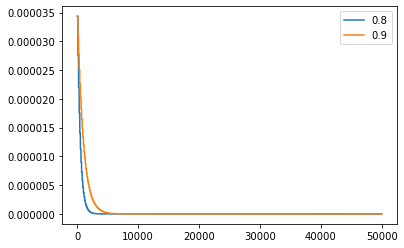

In [59]:
steps = 50000
gamma_sweep = [0.8, 0.9]
lr_schedulers = []
for gamma in gamma_sweep:
    optimizer = torch.optim.Adam(model.parameters(), lr=model.learning_rate, betas=(
            model.adam_b1, model.adam_b2), weight_decay=model.adam_l2_weightdecay)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10000, gamma=gamma)
    lr_schedulers.append(scheduler)

values = []
for i in range(steps):
    lr_updates = []
    for scheduler in lr_schedulers:
        scheduler.optimizer.step()
        scheduler.step()
        # lr_updates.append(scheduler.optimizer.param_groups[0]["lr"])
        lr_updates.append(scheduler.get_last_lr()[0])
    values.append(lr_updates)


plt.plot(np.arange(0, steps), values)
plt.legend(gamma_sweep)

In [54]:

# optimizer = torch.optim.Adam(model.parameters(), lr=model.learning_rate, betas=(
#             model.adam_b1, model.adam_b2), weight_decay=model.adam_l2_weightdecay)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10000, gamma=model.gamma)
# # scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=model.T_max)
# scheduler.optimizer.param_groups[0]["lr"]

3.4375e-05

In [55]:
# # Three settings of the lrate hyperparameters.
# # opts = [NoamOpt(512, 1, 4000, None), 
# #         NoamOpt(512, 1, 8000, None),
# #         NoamOpt(256, 1, 4000, None)]

# gamma_sweep = [0.8, 0.9]
# lr_schedulers = []
# for gamma in gamma_sweep:
#         print(gamma)


# lrs = []
# l2 = []
# steps = 50000

# for i in range(steps):
# #     optimizer.step()
#     lrs.append(optimizer.param_groups[0]["lr"])
#     l2.append(scheduler.get_last_lr()[0])
# #     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
#     scheduler.step()

# plt.plot(np.arange(0, steps), lrs)
# plt.plot(np.arange(0, steps), l2)
# plt.legend(["512:4000", "512:8000", "256:4000"])
# None